# Quiz 6 - Object Recognition: BoF vs ConvNets
#### Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Instructions ###

Implement SfM of Tomasi and Kanade
  * Use Harris + Cross correlation
  * Use ORB keypoint + ORB descriptor
  * Compute R and S following the algorithm in slides
  * Show the point cloud and camera orientation
  * Compute matrix Q and recompute R and S

Submit a notebook presenting both point cloud and camera orientation for the following configurations:
  * Harris + Cross correlation
  * ORB keypoint + descriptor

In [248]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

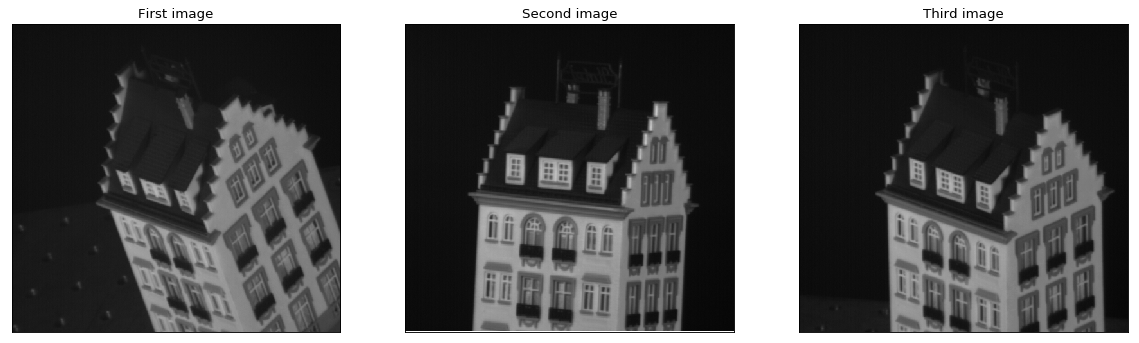

In [249]:
images = []
for image in os.listdir('./sfm_quiz7_images/'):
    images.append(cv2.imread('./sfm_quiz7_images/'+image))

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(images[0])
plt.title('First image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(images[1])
plt.title('Second image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(images[2])
plt.title('Third image'), plt.xticks([]), plt.yticks([])
plt.show()

In [250]:
####using harris
dst1 = cv2.cornerHarris(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY),2,3,0.04)
dst2 = cv2.cornerHarris(cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY),2,3,0.04)
dst3 = cv2.cornerHarris(cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY),2,3,0.04)

####using orb
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(images[0],None)
kp2, des2 = orb.detectAndCompute(images[1],None)
kp3, des3 = orb.detectAndCompute(images[2],None)


In [251]:
def normalize_kps(kp):
    x, y = 0, 0
    normalized_kps = []
    for i in range(len(kp)):
        x, y = x + kp[i].pt[0], y + kp[i].pt[1]
    x, y = x/len(kp), y/len(kp) 
    for i in range(len(kp)):
        normalized_kps.append((kp[i].pt[0] - x,kp[i].pt[1] - y))
    return normalized_kps
    
normalized_kp1 = np.array(normalize_kps(kp1))
normalized_kp2 = np.array(normalize_kps(kp2))
normalized_kp3 = np.array(normalize_kps(kp3))

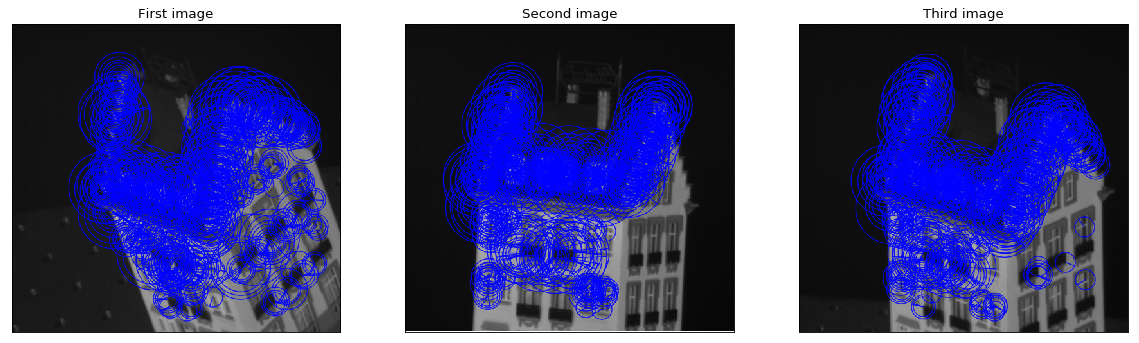

In [252]:
img_kp1 = cv2.drawKeypoints(images[0], kp1, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp2 = cv2.drawKeypoints(images[1], kp2, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp3 = cv2.drawKeypoints(images[2], kp3, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(img_kp1)
plt.title('First image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_kp2)
plt.title('Second image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_kp3)
plt.title('Third image'), plt.xticks([]), plt.yticks([])
plt.show()

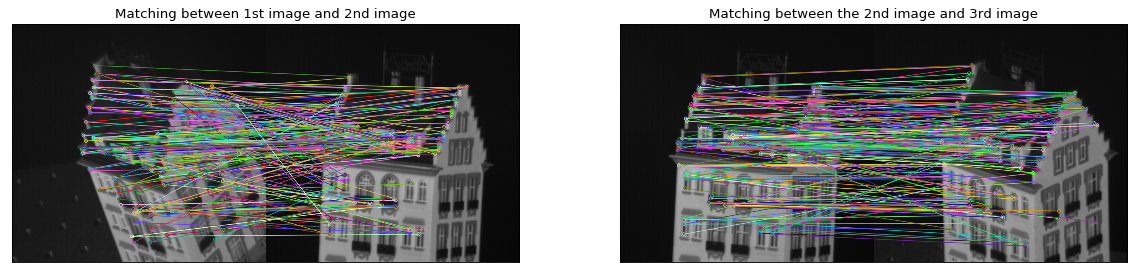

In [253]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches1 = bf.match(des1,des2)
# Sort them in the order of their distance.
matches1 = sorted(matches1, key = lambda x:x.distance)
# Draw first 10 matches.
img1 = cv2.drawMatches(images[0],kp1,images[1],kp2,matches1,None,flags=2)

matches2 = bf.match(des2,des3)
# Sort them in the order of their distance.
matches2 = sorted(matches2, key = lambda x:x.distance)
# Draw first 10 matches.
img2 = cv2.drawMatches(images[1],kp2,images[2],kp3,matches2,None,flags=2)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121),plt.imshow(img1)
plt.title('Matching between 1st image and 2nd image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Matching between the 2nd image and 3rd image'), plt.xticks([]), plt.yticks([])
plt.show()

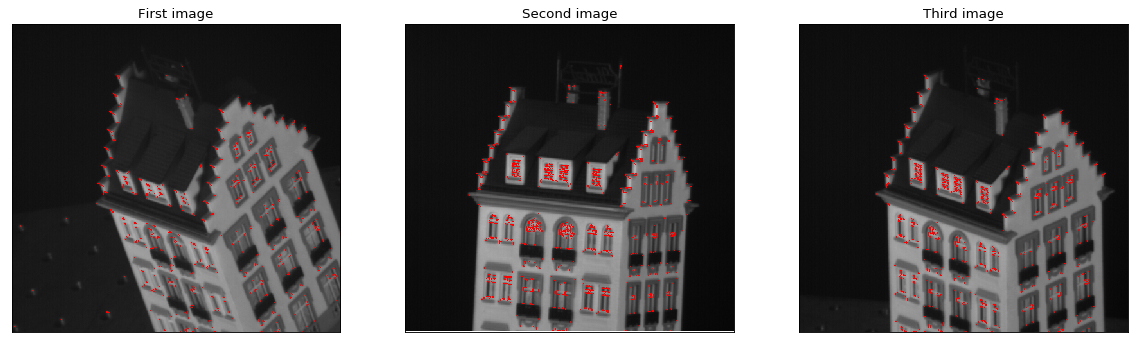

In [254]:
imgcorners3 = images[2].copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners3[dst3>0.01*dst3.max()]=[0,0,255]
imgcorners3 = cv2.cvtColor(imgcorners3, cv2.COLOR_BGR2RGB)
imgcorners2 = images[1].copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners2[dst2>0.01*dst2.max()]=[0,0,255]
imgcorners2 = cv2.cvtColor(imgcorners2, cv2.COLOR_BGR2RGB)
imgcorners1 = images[0].copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners1[dst1>0.01*dst1.max()]=[0,0,255]
imgcorners1 = cv2.cvtColor(imgcorners1, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(imgcorners1)
plt.title('First image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgcorners2)
plt.title('Second image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(imgcorners3)
plt.title('Third image'), plt.xticks([]), plt.yticks([])
plt.show()

In [255]:
W = []
for match in matches1:
    for m in matches2:
        if match.queryIdx == m.trainIdx:
            #column = [normalized_kp1[match.trainIdx].pt[0],normalized_kp2[match.queryIdx].pt[0],normalized_kp3[m.queryIdx].pt[0],
            #         normalized_kp1[match.trainIdx].pt[1],normalized_kp2[match.queryIdx].pt[1],normalized_kp3[m.queryIdx].pt[1]]
            column = [normalized_kp1[match.trainIdx][0],normalized_kp2[match.queryIdx][0],normalized_kp3[m.queryIdx][0],
                     normalized_kp1[match.trainIdx][1],normalized_kp2[match.queryIdx][1],normalized_kp3[m.queryIdx][1]]
            W.append(column)
W = np.array(W)
W = np.transpose(W)
W.shape

(6, 127)

In [256]:
U, D, V = np.linalg.svd(W, full_matrices=True)
U_3 = U[:,0:3]
V_3 = V[0:3,:]
D_3 = np.eye(3)*D[0:3]
D_3_12 = np.sqrt(D_3)

In [257]:
R = np.dot(U_3,D_3_12)
S = np.dot(D_3_12,V_3)

In [266]:
print(R.shape,S.shape)
print(R)
print(S[0].shape,S[1].shape,S[2].shape)

(6, 3) (3, 127)
[[-24.3686349    3.96094507 -21.09268364]
 [-17.32067972  -4.85367172  14.39484825]
 [-11.61994208  -0.98015007   4.72130034]
 [ 11.66171407 -12.72567512 -16.61480868]
 [  5.84956672  22.66465926  -2.85111827]
 [ -0.96951043 -17.4205368   -0.64449097]]
(127,) (127,) (127,)


<IPython.core.display.Javascript object>


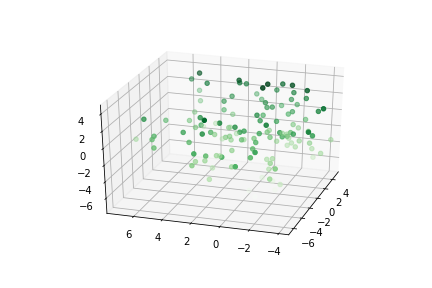

In [265]:
# R
# point_cloud_1 = []
# for i in range(len(images)):
#     for x in range(images[i].shape[0]):
#         for y in range(images[i].shape[1]):
#             z = x*R[i][0]
from mpl_toolkits import mplot3d
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(S[0], S[1], S[2], c=S[2], cmap='Greens');

In [260]:
%matplotlib inline
def g_line(a,b):
    return [a[0]*b[0],a[0]*b[1]+a[1]*b[0],a[0]*b[2]+a[2]*b[0],a[1]*b[1],a[1]*b[2]+a[2]*b[1],a[2]*b[2]]
G = []
for i in range(3):
    G.append(g_line(R[i],R[i]))
for j in range(3):
    G.append(g_line(R[j+3],R[j+3]))
for i in range(3):
    G.append(g_line(R[i],R[i+3]))

c = np.array([1,1,1,1,1,1,0,0,0])

In [261]:
l = np.dot(np.linalg.pinv(G),c)
L = np.zeros((3,3))
L[0][0] = l[0]
L[0][1] = l[1]
L[0][2] = l[2]
L[1][0] = l[1]
L[1][1] = l[3]
L[1][2] = l[4]
L[2][0] = l[2]
L[2][1] = l[4]
L[2][2] = l[5]

In [262]:
U,D,UT = np.linalg.cholesky(L)
U = np.reshape(U,(3,1))
D = np.reshape(D,(3,1))
print(U.shape,D.shape,UT.shape)
D[np.where(D<0)] = 0.01
print ()
Q = np.dot(U,np.sqrt(D))
print(Q)
Q1 = np.linalg.inv(Q)

LinAlgError: Matrix is not positive definite

In [ ]:
R_final = np.dot(R,Q)
S_final = np.dot(Q1,S)

In [ ]:
print('R: ',R_final.shape,' S: ',S_final.shape)
print(R_final)
print('-----------')
print(S_final)

In [ ]:
print('R: ',R.shape,' S: ',S.shape)
print(R)
print('-----------')
print(S)

In [ ]:
print('Q: ',Q.shape,' Q_1: ',Q1.shape)
print(Q)
print(Q1)

In [ ]:
print(matches[1].trainIdx,matches[1].queryIdx)
print(kp1[67].pt,kp2[175].pt)

In [ ]:
a = cv2.circle(images[0].copy(),(int(kp1[362].pt[0]),int(kp1[362].pt[1])),10,(255,0,0),-1)
b = cv2.circle(images[1].copy(),(int(kp2[355].pt[0]),int(kp2[355].pt[1])),10,(255,0,0),-1)
plt.imshow(a),plt.show()

In [ ]:
plt.imshow(b),plt.show()

In [ ]:
len(matches)